<a href="https://colab.research.google.com/github/SimonThoabaladev/Data-Analysis/blob/main/Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

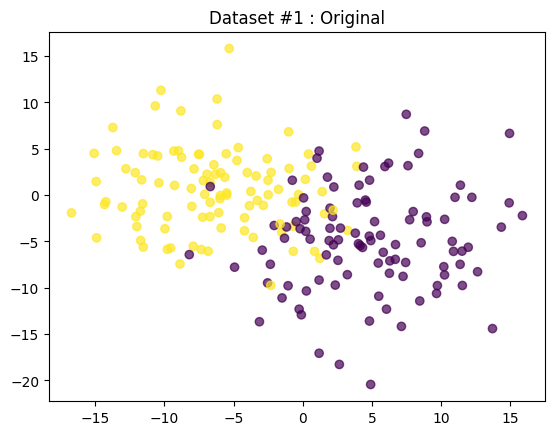

In [9]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std= 5, random_state=123)
plt.scatter(X1[:,0], X1[:, 1], c = label1, alpha=0.7)
plt.title('Dataset #1 : Original')
plt.show()

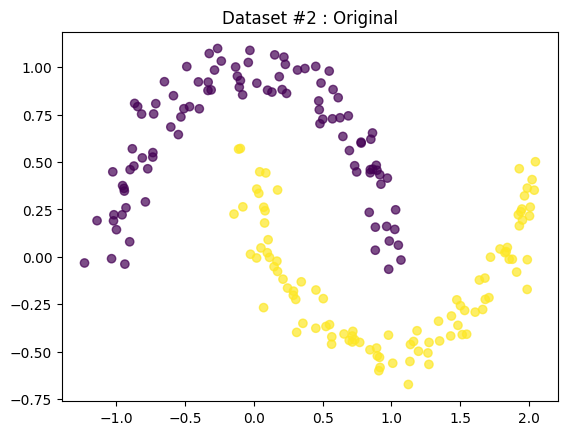

In [10]:
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0], X2[:, 1], c=label2, alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
import numpy as np
import pandas as pd

In [13]:
X1

array([[ 4.83455936e+00,  1.61209639e+00],
       [-7.19342110e+00,  1.57331116e+00],
       [-1.19919003e+01, -3.38784956e+00],
       [ 8.94965320e+00, -2.34628131e+00],
       [ 5.46630481e+00, -7.33334000e+00],
       [-9.82679362e-01,  2.87439331e+00],
       [ 4.82713114e+00, -1.35870919e+01],
       [-5.95639441e+00, -4.86198432e-02],
       [ 3.25723451e+00, -3.81242660e+00],
       [-1.49388489e+01,  1.46494770e+00],
       [-9.32588959e+00,  4.75039194e+00],
       [ 1.23752259e+00, -6.81998526e+00],
       [ 1.19728386e+01, -5.62837526e+00],
       [-2.58199902e-01, -1.23070271e+01],
       [ 1.49590341e+01,  6.65671714e+00],
       [ 2.25314845e-01, -3.91267708e+00],
       [-5.93898363e+00,  2.41971297e+00],
       [-4.66024882e+00,  5.12509843e+00],
       [-2.49261965e+00,  3.07334679e-02],
       [ 7.73413068e+00, -2.65986906e+00],
       [-5.12306455e-01, -7.42476287e-01],
       [ 1.57887480e+00, -2.01725863e+00],
       [-4.20565001e+00, -2.44769569e+00],
       [-4.

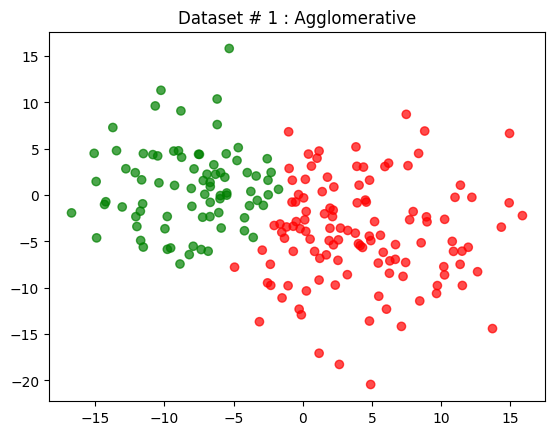

In [14]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0: 'red', 1 : 'green'}
plt.scatter(X1[:, 0], X1[:, 1], c= pd.Series(agglo.labels_). apply(lambda X: myColors[X]), alpha=0.7)
plt.title('Dataset # 1 : Agglomerative')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

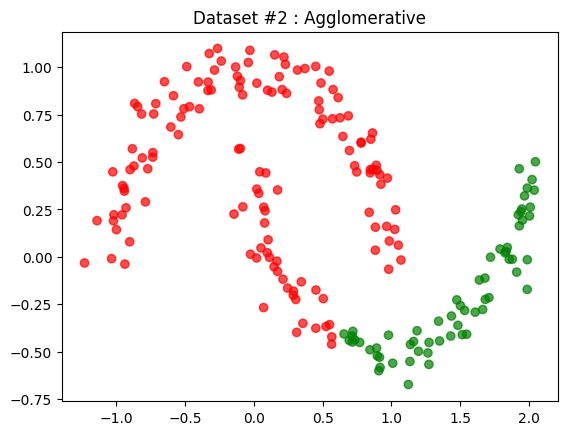

In [15]:
agglo = AgglomerativeClustering(n_clusters = 2)
agglo.fit(X2)
# Defining color pattern
mycolors = {0: 'red', 1: 'green'}
plt.scatter(X2[:,0], X2[:, 1], c= pd.Series(agglo.labels_).apply(lambda x: mycolors[x]), alpha = 0.7)
plt.title('Dataset #2 : Agglomerative')
plt.show

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

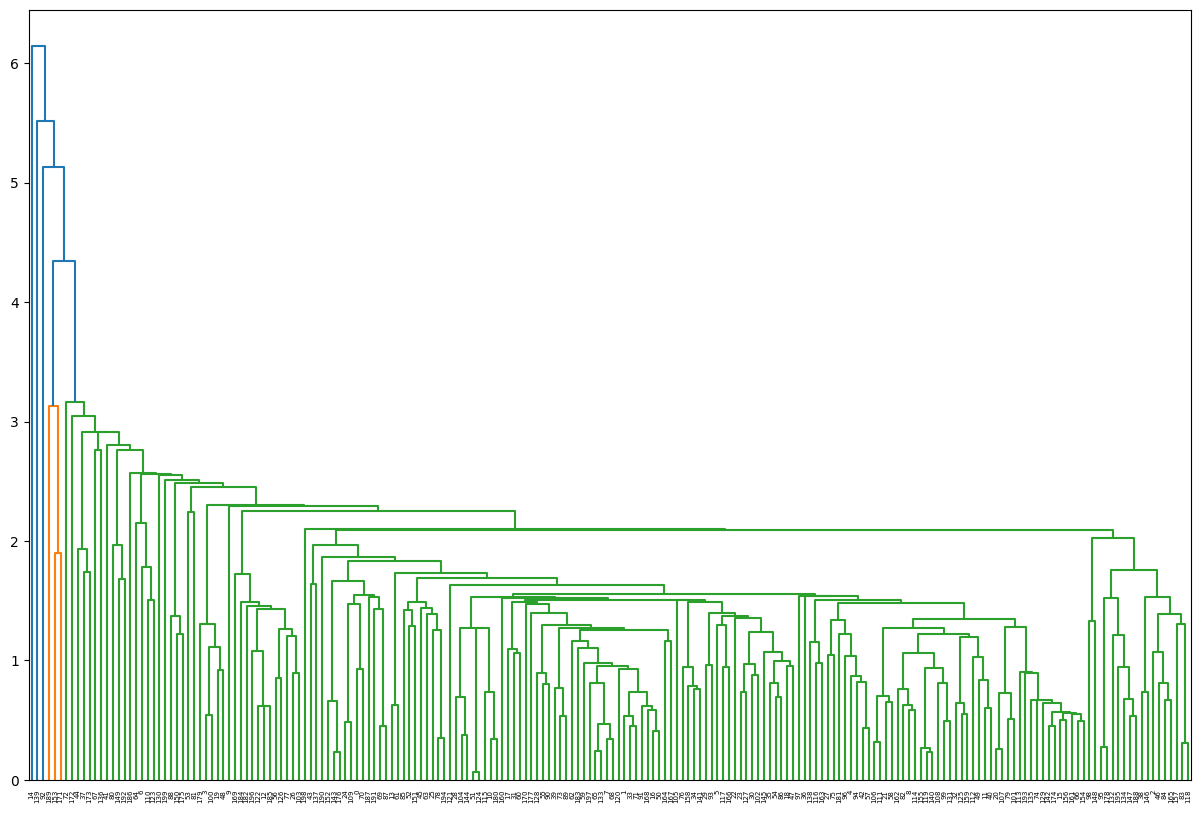

In [17]:
myLinkage = linkage(X1, method='single')
plt.figure(figsize=(15, 10))
dendrogram(myLinkage)
plt.show()

In [19]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

,count
1,197
4,1
2,1
3,1


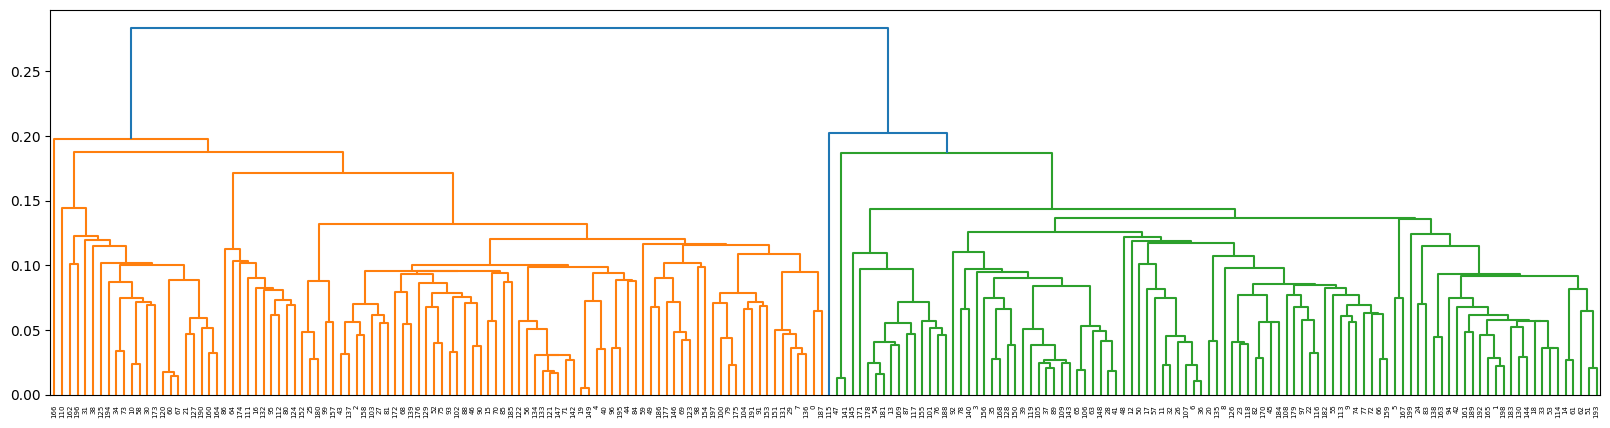

In [20]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20, 5))
dendrogram(myLinkage)
plt.show()

In [22]:
labels = fcluster(myLinkage, 0.23, criterion='distance')
pd.Series(labels).value_counts()

,count
1,100
2,100


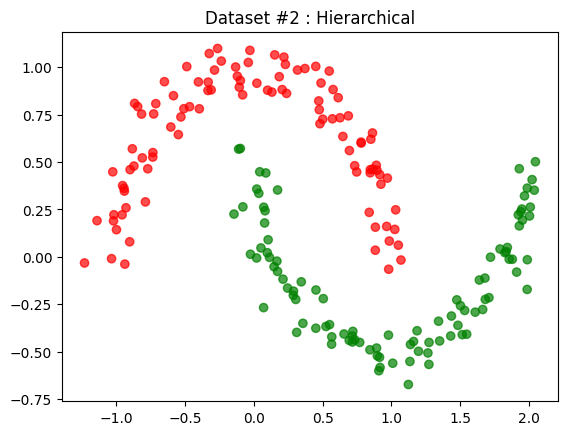

In [23]:
myColors = {1: 'red', 2: 'green'}
plt.scatter(X2[:, 0], X2[:, 1], c=pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2 : Hierarchical')
plt.show()

In [24]:
from sklearn.datasets import load_iris


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [26]:
iris=load_iris()

In [30]:
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
iris_data_pd.iloc[:,2:4]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


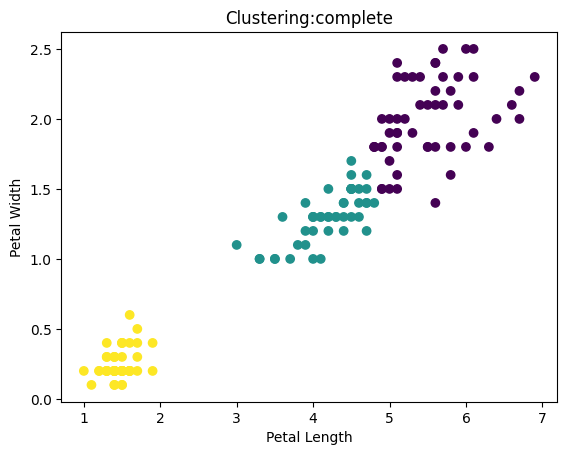

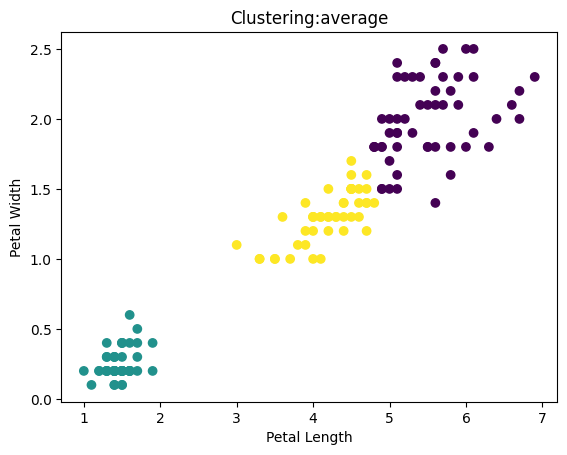

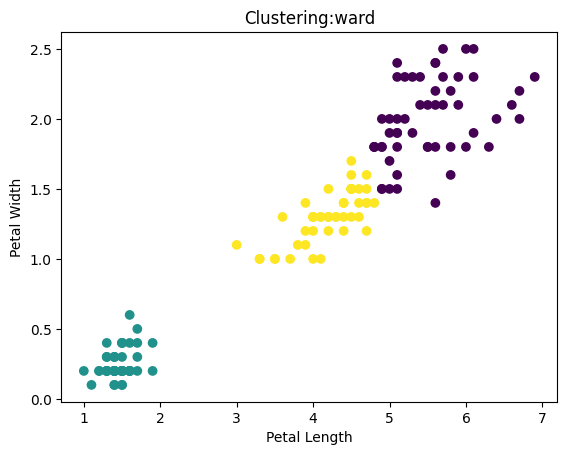

In [33]:
from sklearn.cluster import AgglomerativeClustering
linkage=["complete","average","ward"]
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier=AgglomerativeClustering(n_clusters=3, linkage=i)
    hier.fit(iris_data_pd.iloc[:,2:4])
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=hier.labels_)
    plt.title("Clustering:" +i)
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.show()

In [34]:
from scipy.cluster import hierarchy


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [65.0, 65.0, 96.25, 96.25],
  [125.0, 125.0, 135.0, 135.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [130.0, 130.0, 153.75, 153.75],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [212.5, 212.5, 240.0, 240.0],
  [190.0, 190.0, 226.25, 226.25],
  [141.875, 141.875, 208.125, 208.125],
  [80.625, 80.625, 175.0, 175.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5,

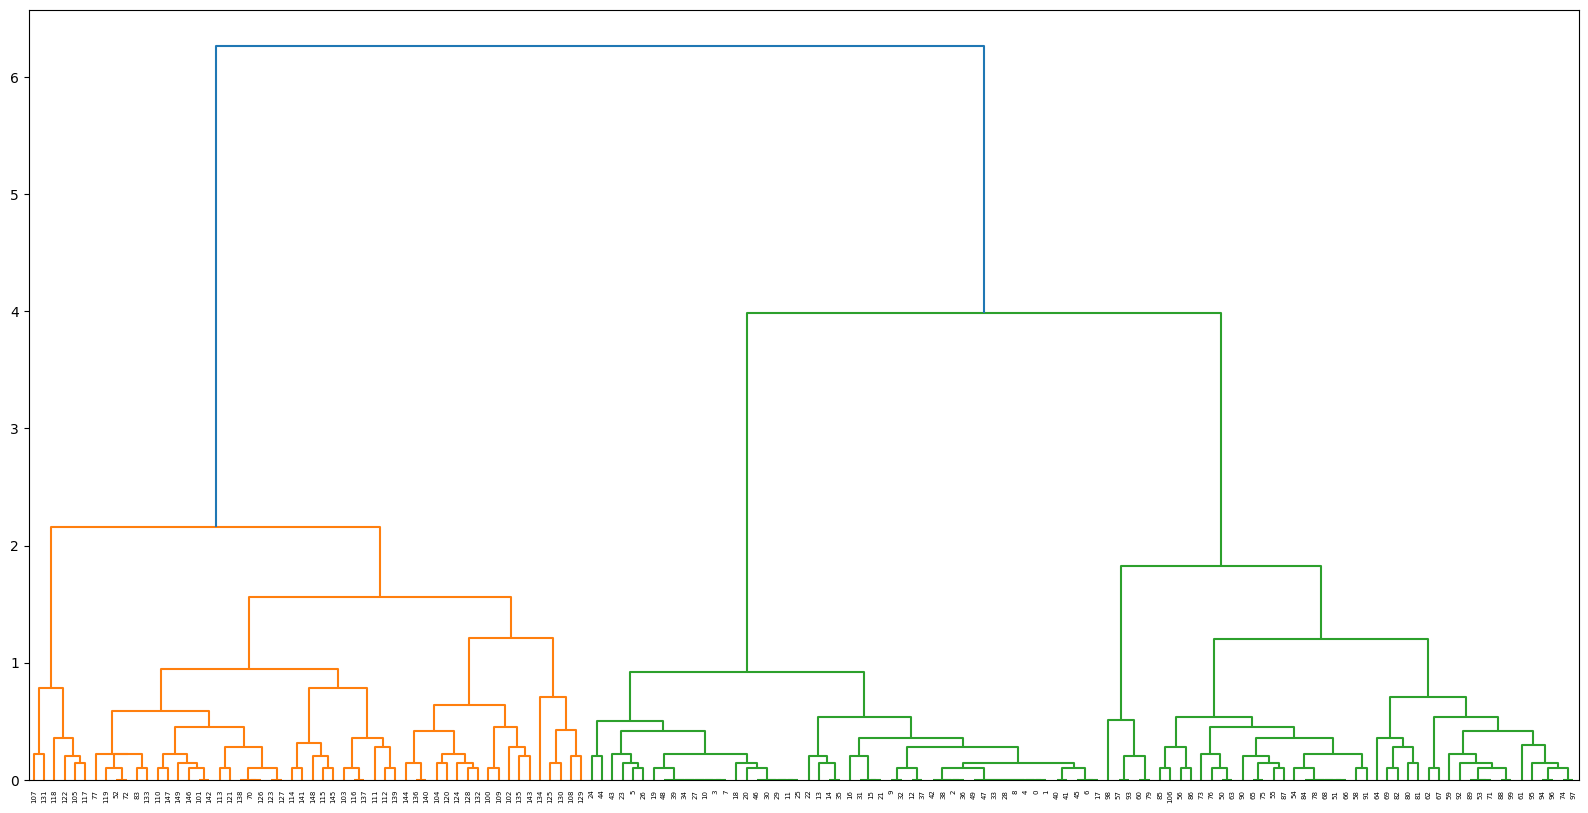

In [35]:
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4],method="complete")
plt.figure(figsize=(20,10))
hierarchy.dendrogram(hierar)


{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [95.0, 95.0, 113.75, 113.75],
  [85.0, 85.0, 104.375, 104.375],
  [75.0, 75.0, 94.6875, 94.6875],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [84.84375, 84.84375, 152.5, 152.5],
  [185.0, 185.0, 195.0, 195.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [225.0, 225.0, 244.375, 244.375],
  [215.0, 215.0, 234.6875, 234.6875],
  [205.0, 205.0, 224.84375, 224.84375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [214.921875, 214.921875, 293.75, 293.75],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [332.5, 332.5, 360.0, 360.0],
  [254.3359375, 254.3359375, 346.25, 346.25],
  [190.0, 190.0, 300.29296875, 300.29296875],
  [175.0, 175.0, 245.1464843

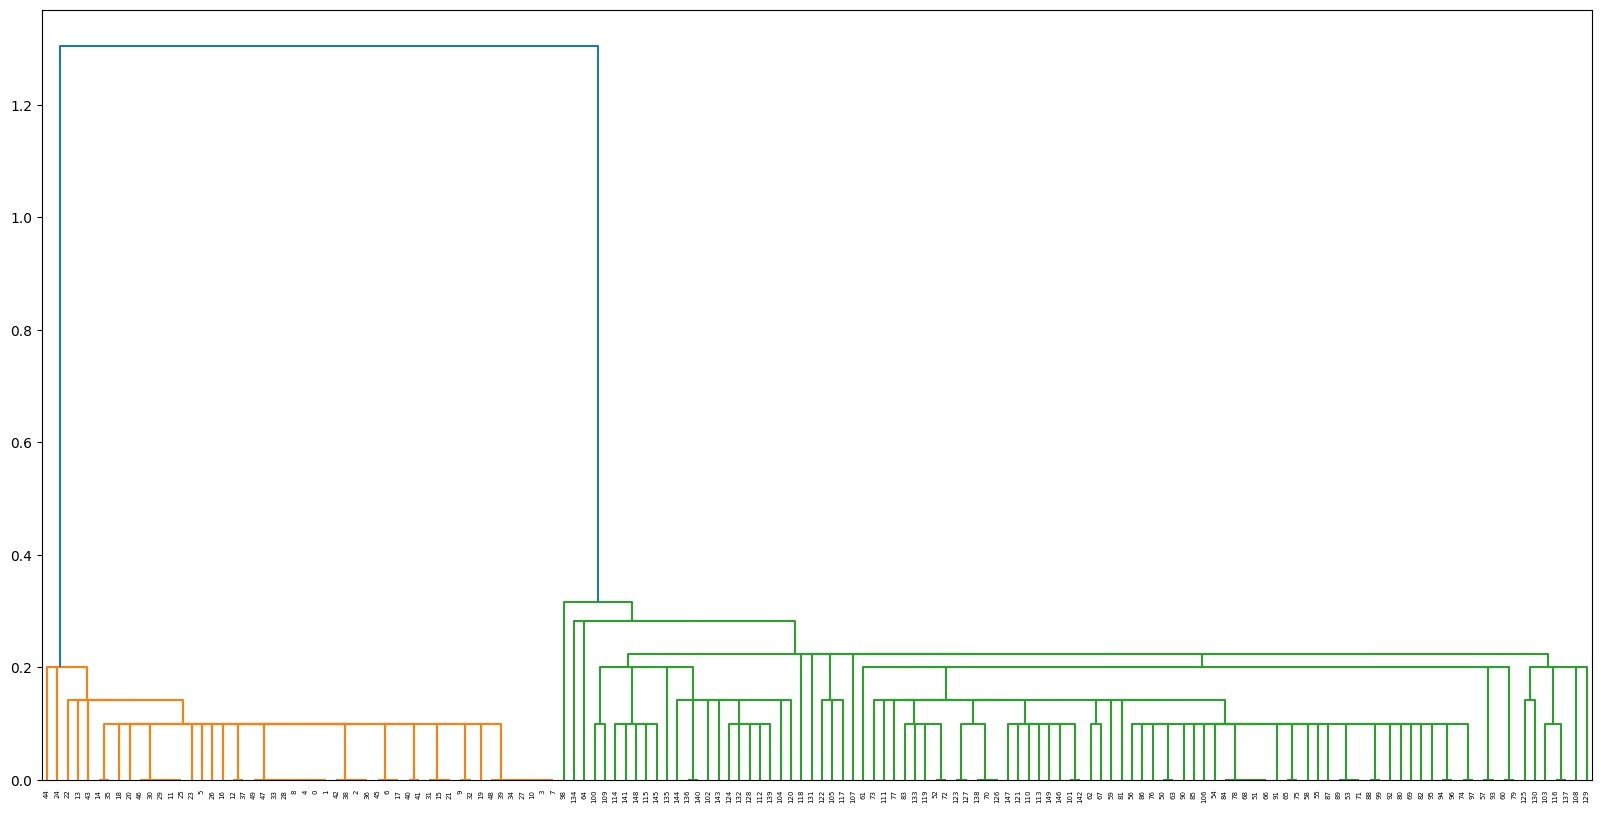

In [36]:
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4],method="single")
plt.figure(figsize=(20,10))
hierarchy.dendrogram(hierar)